## 21BAI1176 SANNIDHYA PRADYUMNA MATE MACHINE VISION LAB ASSIGNMENT-4
#### 13th November 2024

<h1 style="text-align: center;"> LAB ASSIGNMENT 4

#### GitHub Link - https://github.com/sannidhya2003/Machine-Vision

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from moviepy.video.io import ImageSequenceClip

#### Utility functions

In [2]:
def generateOutputVideo(img_list,file_name):
    clip = ImageSequenceClip.ImageSequenceClip(img_list,fps=fps)
    clip.write_videofile(file_name+'.mp4')

In [3]:
def plotFn(row, col, f_s, img_list, title, color=None):
    l = len(img_list)
    if l==0:
        return "Empty list!"
    fig, axes = plt.subplots(row,col,figsize=f_s)

    for i in range(row):
        for j in range(col):
            n = col*i + j
            if n>=l:
                break
            axes[i][j].imshow(img_list[n],cmap=color)
            axes[i][j].set_xticks([])
            axes[i][j].set_yticks([])
            axes[i][j].set_title(title + " " + str(n))
    
    plt.show()

In [4]:
def getFrameList(video):
    success = True
    frameList = []
    while success:
        success, frame = video.read()
        if not success:
            break
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        frameList.append(frame)
    return frameList

## Load Video

In [5]:
vid_path = 'bunny.mp4'
video = cv2.VideoCapture(vid_path)
fps = video.get(cv2.CAP_PROP_FPS)

In [6]:
frameList = getFrameList(video)

In [7]:
len(frameList)

132

In [12]:
n = 120

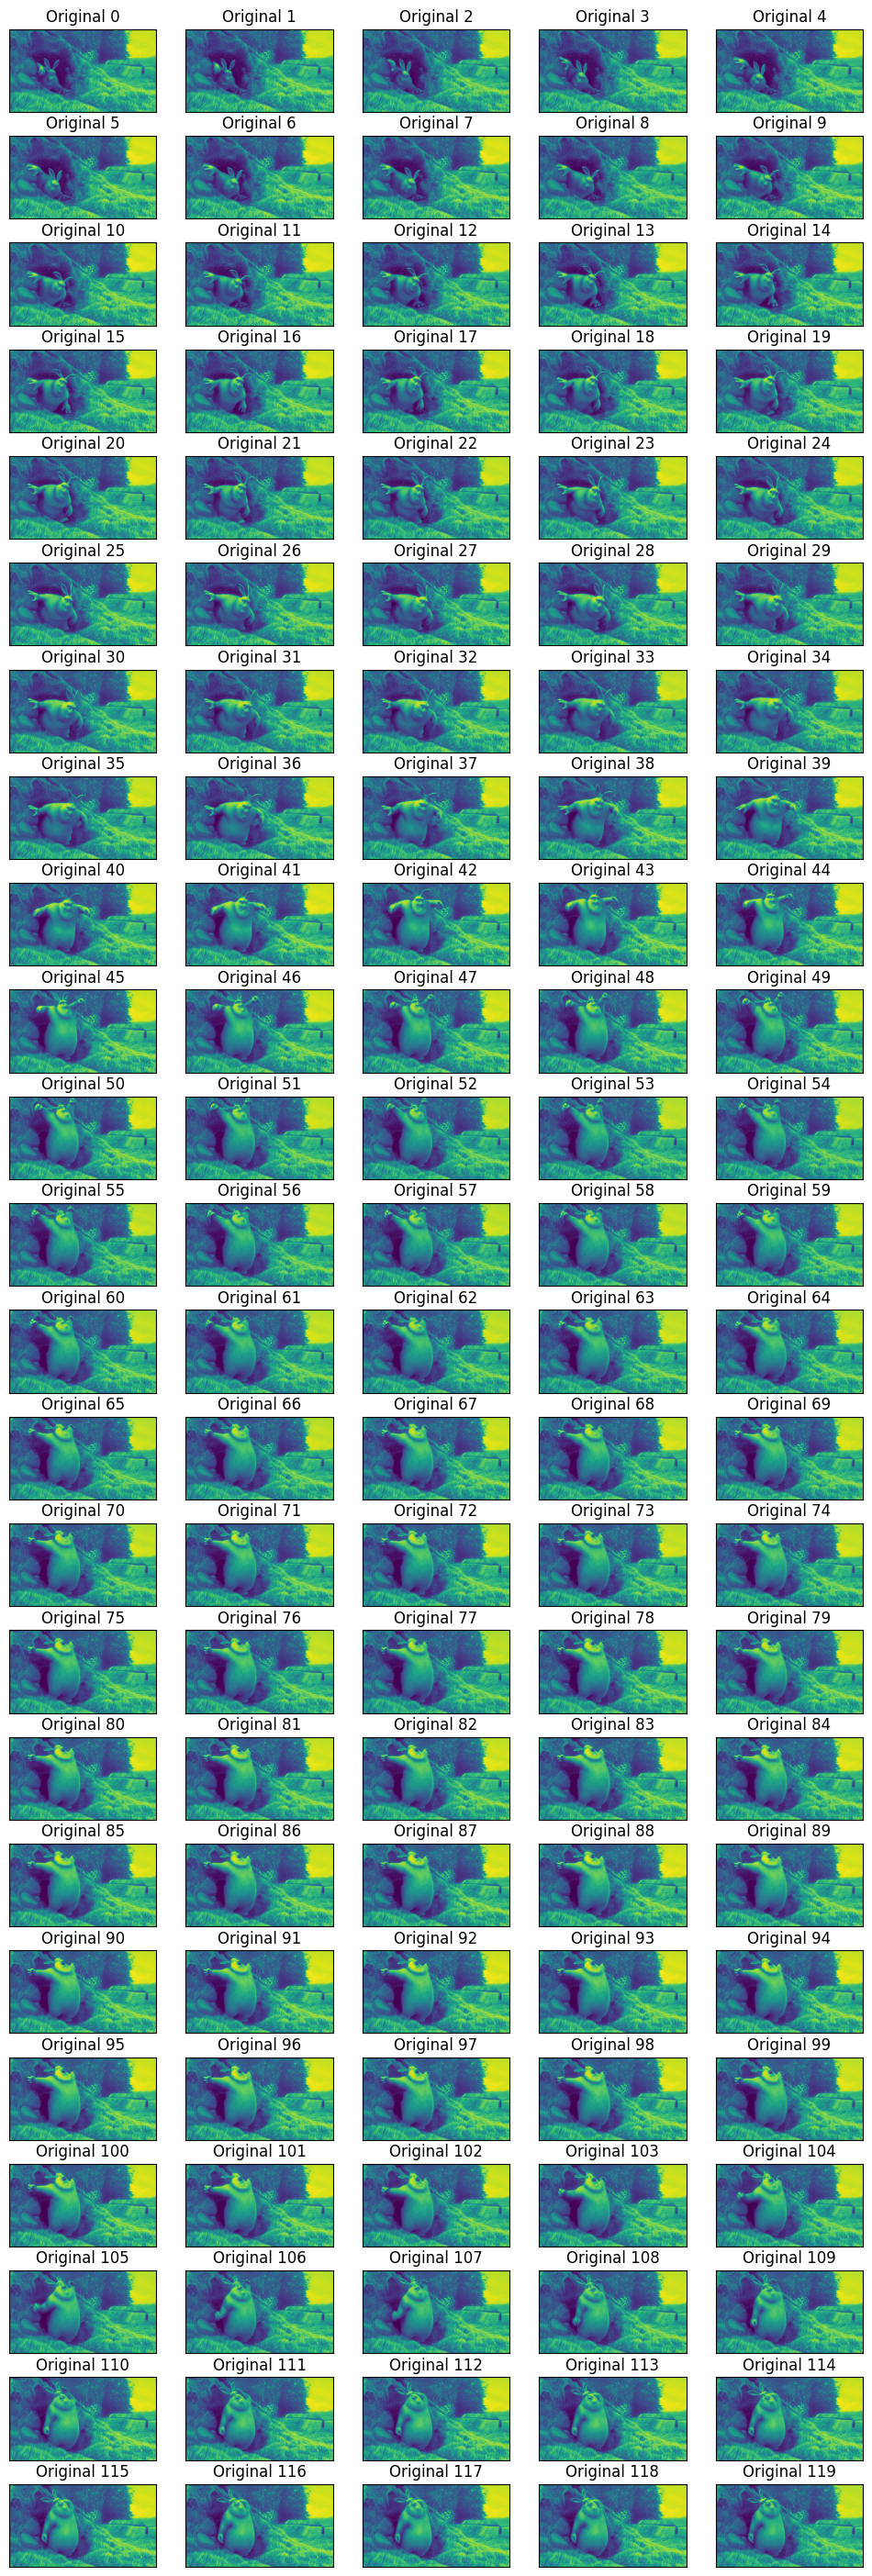

In [13]:
plotFn(24, 5, (12,36), frameList[:n], "Original")

## Motion Estimation

In [14]:
def compute_histogram(image):
    # histogram = np.zeros(256, dtype=int)
    # height, width = image.shape

    # for i in range(height):
    #     for j in range(width):
    #         intensity = image[i, j]
    #         histogram[intensity] += 1
    return cv2.calcHist([image], [0], None, [256], [0, 256])

In [16]:
def getChanges(frameList):
    histograms_list = [compute_histogram(i) for i in frameList]
    similarity_list = [cv2.compareHist(histograms_list[i-1], histograms_list[i], cv2.HISTCMP_CORREL) for i in range(1,len(histograms_list))]
    difference_list = [cv2.absdiff(frameList[i-1], frameList[i]) for i in range(1,len(frameList))]
    thresh_list = [cv2.threshold(i, 25, 255, cv2.THRESH_BINARY)[1] for i in difference_list]
    return similarity_list, thresh_list

In [17]:
similarity_list, thresh_list = getChanges(frameList)

### Histogram similarity

In [19]:
similarity_list[69:n]

[0.9994605031004254,
 0.9995847021201096,
 0.9994293631035381,
 0.9994325694044864,
 0.999438858648691,
 0.999369776360939,
 0.9993444087965614,
 0.9993380536792205,
 0.9996732771374913,
 0.9995931523054684,
 0.9995455468400417,
 0.9997617924730346,
 0.9999717083334769,
 0.9997196137782142,
 0.9996491639458465,
 0.9998675958355903,
 0.9997653417448441,
 0.9998563797197939,
 0.9996997185366576,
 0.9998662182815828,
 0.9998202717196325,
 0.9998777002503267,
 0.9998954887765149,
 0.9998846286001007,
 0.9998762575987298,
 0.9999012893037768,
 0.9998612973987021,
 0.9997665124668124,
 0.9998083676251412,
 0.9997772173237089,
 0.9996109705970028,
 0.9995923904577305,
 0.9993409823209743,
 0.999180302958414,
 0.9988807012352471,
 0.9978370690766051,
 0.9965094207677718,
 0.9999877113417641,
 0.9976069294423191,
 0.999573132841604,
 0.9993024840661975,
 0.99928339940809,
 0.9994849550436651,
 0.9995484976877895,
 0.9998168857827575,
 0.9998626963770395,
 0.9997939826037542,
 0.9999207505403929

#### Regions of motion in the video

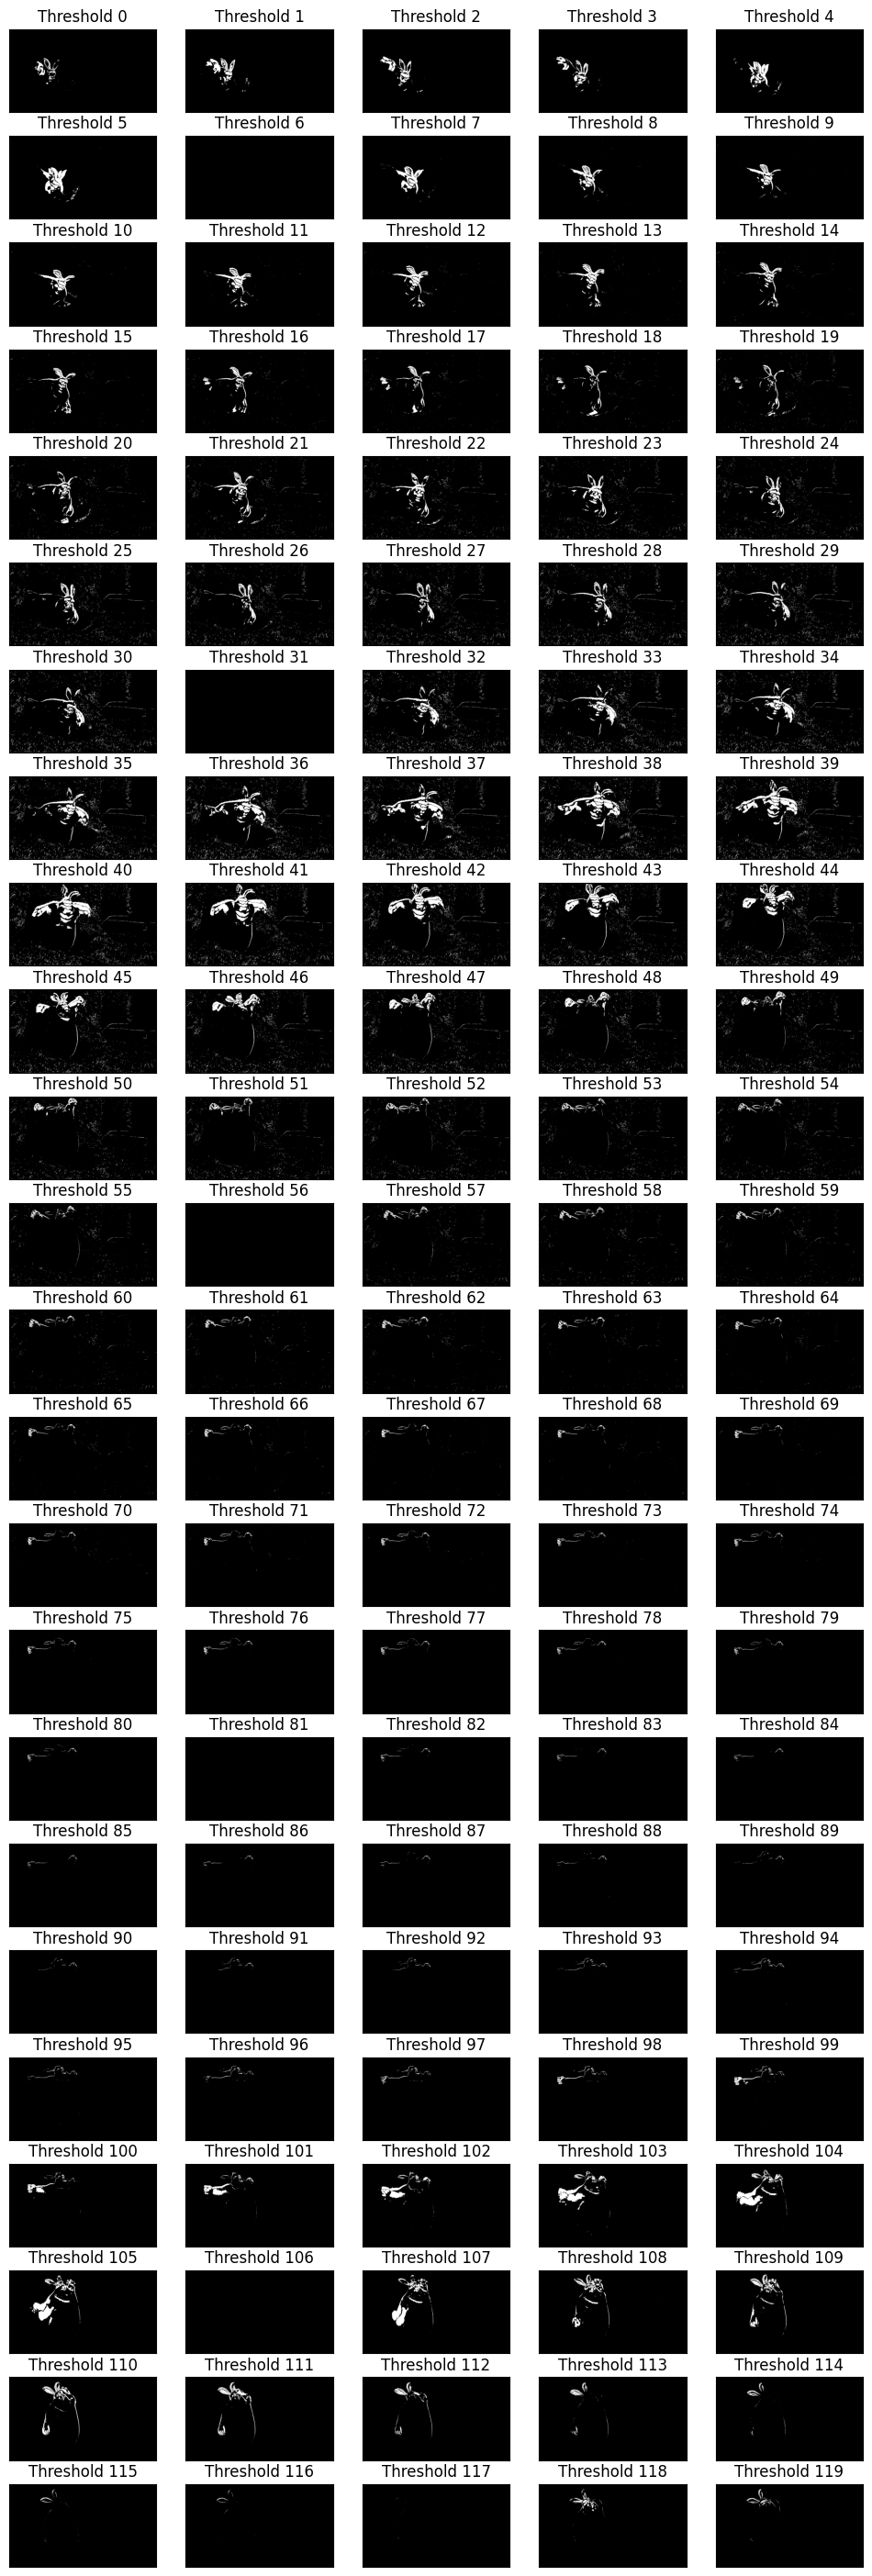

In [20]:
plotFn(24, 5, (12,36), thresh_list[:n], "Threshold",'gray')

## Event Detection

In [21]:
def getContours(thresh, frame):
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    frame = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    for contour in contours:
        if cv2.contourArea(contour) > 500:  # Adjust area threshold as needed
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    return frame

#### Contours marking the regions of motion

In [22]:
contours_list = [getContours(thresh_list[i], frameList[i]) for i in range(len(thresh_list))]

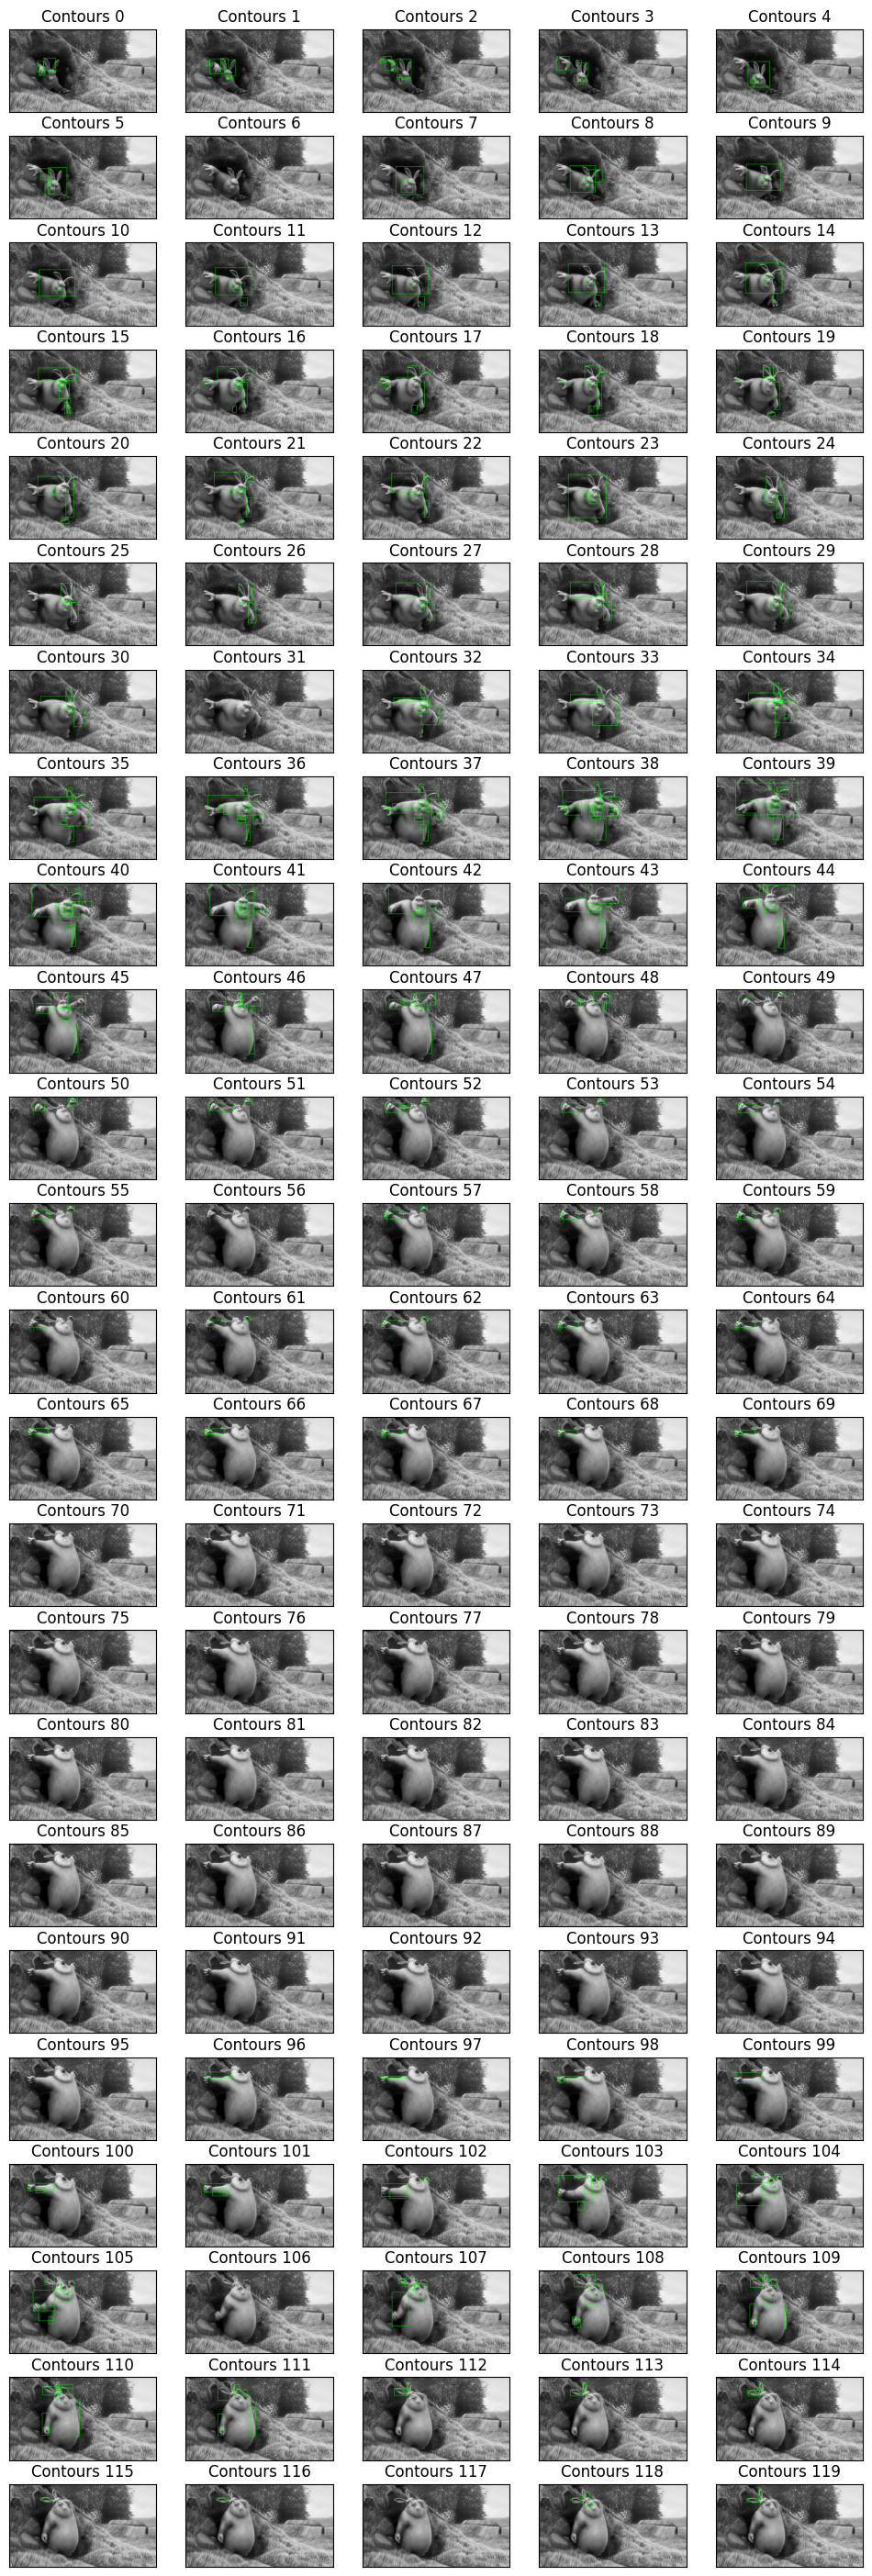

In [23]:
plotFn(24, 5, (12,36), contours_list[:n], "Contours",'gray')